For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week12-word-context-vectors

# Hist 3368 - Week 12: Word Context Vectors with Gensim

## Teaching Version

#### By Jo Guldi

#### Load Software

In [6]:
import pandas as pd
import gensim
import string
import csv
import glob
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import scipy.spatial.distance
import matplotlib
import matplotlib.pyplot as plt
import itertools
import multiprocessing
from multiprocessing import Pool
from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
from nltk.corpus import wordnet as wn
from gensim.models import KeyedVectors

In [7]:
cd /scratch/group/history/hist_3368-jguldi

/scratch/group/history/hist_3368-jguldi


In [8]:
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

In [14]:
man_vector = wv['man']
wv.similar_by_vector(man_vector)

[('man', 1.0),
 ('men', 0.807793378829956),
 ('humble_man', 0.748202919960022),
 ('young_man', 0.7053501009941101),
 ('compassionate_man', 0.6812528371810913),
 ('courageous_man', 0.6772664189338684),
 ('mortal', 0.6644247770309448),
 ('decent_man', 0.6617329120635986),
 ('courageous_men', 0.6595751047134399),
 ('scoop_jackson', 0.6565369367599487)]

### Explore the Contents of Your Vector Model

#### Find the CONTEXT for One Word

In [15]:
woman_vector = wv['woman']
wv.similar_by_vector(woman_vector)

[('woman', 0.9999998807907104),
 ('young_woman', 0.73128342628479),
 ('female', 0.6852490901947021),
 ('married_woman', 0.662540853023529),
 ('male', 0.6420111656188965),
 ('black_woman', 0.636064350605011),
 ('negro', 0.6109408736228943),
 ('lesbian', 0.6071470379829407),
 ('black_man', 0.6047077775001526),
 ('young_men', 0.6010093092918396)]

In [16]:
individual_vector = wv['person']
wv.similar_by_vector(individual_vector)

[('person', 1.0),
 ('individual', 0.8519330620765686),
 ('alien', 0.6763107180595398),
 ('blind_person', 0.6733041405677795),
 ('employee', 0.6700262427330017),
 ('client', 0.6693363189697266),
 ('american_citizen', 0.6683335900306702),
 ('applicant', 0.6600831151008606),
 ('elderly_person', 0.6496081948280334),
 ('registrant', 0.6389296054840088)]

In [17]:
soldier_vector = wv['soldier']
wv.similar_by_vector(soldier_vector)

[('soldier', 1.0),
 ('american_soldier', 0.8481765985488892),
 ('combat_soldier', 0.8198097944259644),
 ('fighting_men', 0.8071495890617371),
 ('marines', 0.7896237969398499),
 ('comrade', 0.7856341004371643),
 ('infantryman', 0.7821188569068909),
 ('sailor', 0.7572413682937622),
 ('men', 0.7442063689231873),
 ('filipino', 0.7437962889671326)]

#### Interpreting vector similarity

Try your own hand at interpreting these outputs. 

How do you interpret these similarities?

In [19]:
wv.most_similar("iraq", topn = 20)

[('iraqi', 0.828130304813385),
 ('libya', 0.8261563777923584),
 ('syria', 0.8153803944587708),
 ('iran', 0.8083710074424744),
 ('israeli_raid', 0.7890540957450867),
 ('egypt', 0.787028968334198),
 ('pakistan', 0.7691728472709656),
 ('iranian', 0.7560648918151855),
 ('yemen', 0.7546976208686829),
 ('argentina', 0.752089262008667),
 ('palestinian_guerrilla', 0.7510983347892761),
 ('israel', 0.7508583068847656),
 ('arab', 0.7411751747131348),
 ('qadhafi', 0.73783940076828),
 ('israeli', 0.7369685769081116),
 ('president_nasser', 0.7357777953147888),
 ('egyptian', 0.7336642146110535),
 ('red_chinese', 0.7245256900787354),
 ('palestinian_terrorist', 0.7214869856834412),
 ('kurd', 0.7212120294570923)]

In [20]:
wv.most_similar("america", topn = 20)

[('nation', 0.8286058306694031),
 ('country', 0.762273907661438),
 ('american', 0.6858243346214294),
 ('western_world', 0.6779216527938843),
 ('world', 0.6668436527252197),
 ('vibrant', 0.6596878170967102),
 ('prosperous_nation', 0.6528997421264648),
 ('western_civilization', 0.6470541954040527),
 ('industrial_democracy', 0.6320473551750183),
 ('beloved_country', 0.6109904646873474),
 ('democracy', 0.6034918427467346),
 ('civilization', 0.6016355156898499),
 ('free_world', 0.5984966158866882),
 ('entire_nation', 0.5780860185623169),
 ('bastion', 0.5771580934524536),
 ('oppress_peoples', 0.5771055817604065),
 ('living_symbol', 0.5770482420921326),
 ('society', 0.576115608215332),
 ('free_peoples', 0.5749778747558594),
 ('american_heritage', 0.5728517770767212)]

In [21]:
wv.most_similar("britain", topn = 20)

[('great_britain', 0.881572961807251),
 ('france', 0.839850902557373),
 ('england', 0.7883251309394836),
 ('british', 0.7847045063972473),
 ('austria', 0.7666051387786865),
 ('west_germany', 0.7588381171226501),
 ('spain', 0.751839280128479),
 ('finland', 0.7480441927909851),
 ('germany', 0.7439076900482178),
 ('french', 0.7341104745864868),
 ('japan', 0.7211131453514099),
 ('german', 0.7158097624778748),
 ('sweden', 0.7094542384147644),
 ('russia', 0.7072551846504211),
 ('italy', 0.7070389986038208),
 ('portugal', 0.7047058343887329),
 ('european', 0.6980457901954651),
 ('netherlands', 0.6965853571891785),
 ('algeria', 0.6932830214500427),
 ('nigeria', 0.6887795329093933)]

## Subtracting Vectors

In [22]:
diff = wv['man'] - wv['woman']
wv.similar_by_vector(diff)

[('obsequious', 0.41747480630874634),
 ('wit', 0.3983602821826935),
 ('man', 0.3822146952152252),
 ('frankness', 0.37479647994041443),
 ('tact', 0.36495867371559143),
 ('warm_personality', 0.3633611798286438),
 ('watt', 0.36321771144866943),
 ('good_humor', 0.3601587116718292),
 ('hull', 0.3599074184894562),
 ('gentleness', 0.35661593079566956)]

In [23]:
diff = wv['woman'] - wv['boy']
wv.similar_by_vector(diff)

[('woman', 0.6418045163154602),
 ('equal', 0.46115225553512573),
 ('married_woman', 0.4570440948009491),
 ('equality', 0.44616231322288513),
 ('older_worker', 0.44316259026527405),
 ('unequal_treatment', 0.42633432149887085),
 ('inequality', 0.4229995012283325),
 ('sex', 0.42135125398635864),
 ('federal_employee', 0.40536707639694214),
 ('injustice', 0.40459683537483215)]

In [26]:
diff = wv['people'] - wv['person']
wv.similar_by_vector(diff)

[('folks', 0.5262150764465332),
 ('join_hands', 0.522945761680603),
 ('people', 0.5129111409187317),
 ('american_people', 0.47589215636253357),
 ('peoples', 0.4711779057979584),
 ('fiscal_sanity', 0.46897488832473755),
 ('someday', 0.46845543384552),
 ('falter', 0.46798810362815857),
 ('earnest_desire', 0.46619537472724915),
 ('neighbor', 0.46536919474601746)]

In [27]:
diff = wv['person'] - wv['people']
wv.similar_by_vector(diff)

[('transferee', 0.5878247618675232),
 ('paragraph_1', 0.5707224011421204),
 ('subsection', 0.5703042149543762),
 ('unlawful', 0.5554789900779724),
 ('hereunder', 0.5537802577018738),
 ('receipt', 0.5510559678077698),
 ('thereunder', 0.544347882270813),
 ('deposition', 0.5417203903198242),
 ('file', 0.5347630977630615),
 ('assignee', 0.530541181564331)]

In [28]:
diff = wv['think'] - wv['heart']
wv.similar_by_vector(diff)

[('think', 0.7182238698005676),
 ('believe', 0.5849282145500183),
 ('feel', 0.5409349203109741),
 ('sure', 0.5255907773971558),
 ('certainly', 0.5255528688430786),
 ('probably', 0.520268976688385),
 ('personally_feel', 0.4826715290546417),
 ('suggest', 0.4710257649421692),
 ('maybe', 0.4622296094894409),
 ('obviously', 0.46169501543045044)]

In [29]:
diff = wv['feel'] - wv['think']
wv.similar_by_vector(diff)

[('deceased_serviceman', 0.4442118704319),
 ('suffer_undue', 0.4359744191169739),
 ('kin', 0.4214315414428711),
 ('heartfelt_sorrow', 0.4116763174533844),
 ('immediate_release', 0.4072585105895996),
 ('aliyah', 0.39729395508766174),
 ('nonessential_personnel', 0.3947565257549286),
 ('legal_guardian', 0.3923892676830292),
 ('adoptive_parent', 0.3881300389766693),
 ('dependent', 0.38710734248161316)]

### Adding vectors to find synonyms

In [30]:
keyword_context = [word[0] for word in wv.most_similar("woman", topn = 100)]

sum = wv[keyword_context[0]] 

for word in keyword_context[1:len(keyword_context)]:
    next_vector = wv[word] 
    sum = sum + next_vector
    
wv.similar_by_vector(sum)

[('young_woman', 0.8613614439964294),
 ('woman', 0.8177606463432312),
 ('adult', 0.8079615235328674),
 ('young_girl', 0.7920001745223999),
 ('youngster', 0.7716776132583618),
 ('teenager', 0.7670499682426453),
 ('black_woman', 0.7663631439208984),
 ('young_men', 0.7652073502540588),
 ('youth', 0.764229416847229),
 ('young_people', 0.759830892086029)]

In [32]:
keyword_context = [word[0] for word in wv.most_similar("soldier", topn = 100)]
sum = wv[keyword_context[0]] 
for word in keyword_context[1:len(keyword_context)]:
    next_vector = wv[word] 
    sum = sum + next_vector
wv.similar_by_vector(sum)

[('soldier', 0.926078736782074),
 ('american_soldier', 0.8667716979980469),
 ('combat_soldier', 0.8663846254348755),
 ('marines', 0.8529439568519592),
 ('airman', 0.8397200703620911),
 ('infantry_unit', 0.8384497165679932),
 ('infantryman', 0.8350288271903992),
 ('comrade', 0.8217613697052002),
 ('paratrooper', 0.8192169666290283),
 ('french_army', 0.816373884677887)]

In [34]:
keyword_context = [word[0] for word in wv.most_similar("happy", topn = 100)]
sum = wv[keyword_context[0]] 
for word in keyword_context[1:len(keyword_context)]:
    next_vector = wv[word] 
    sum = sum + next_vector
wv.similar_by_vector(sum)

[('grateful', 0.8584318161010742),
 ('happy', 0.8392285108566284),
 ('delight', 0.833162248134613),
 ('appreciative', 0.7715662121772766),
 ('glad', 0.7521904706954956),
 ('deeply_grateful', 0.7353523373603821),
 ('deeply_appreciate', 0.7271850109100342),
 ('thankful', 0.7192312479019165),
 ('appreciate', 0.7053251266479492),
 ('gracious', 0.6979071497917175)]

In [35]:
keyword_context = [word[0] for word in wv.most_similar("american", topn = 100)]
sum = wv[keyword_context[0]] 
for word in keyword_context[1:len(keyword_context)]:
    next_vector = wv[word] 
    sum = sum + next_vector
wv.similar_by_vector(sum)

[('countryman', 0.8622460961341858),
 ('american', 0.8094232678413391),
 ('fellow_countryman', 0.8070399165153503),
 ('compatriot', 0.7987014055252075),
 ('peoples', 0.7862754464149475),
 ('fellow_citizen', 0.7842845320701599),
 ('polish_people', 0.7827718257904053),
 ('pole', 0.7638922333717346),
 ('brave_people', 0.7611224055290222),
 ('oppress_peoples', 0.7551296949386597)]

### Distance and Similarity with Vectors in GENSIM

With similarity, the higher the number, the more alike two terms are in the context in which they are used. 

In [43]:
wv.similarity('woman', 'female')

0.6852491

In [37]:
wv.similarity('woman', 'man')

0.4548094

In [38]:
wv.similarity('soldier', 'man')

0.5337367

In [39]:
wv.similarity('woman', 'person')

0.4633819

In [44]:
wv.similarity('woman', 'rock')

0.06978222

#### Visualize the similarities as a Dendrogram

In [50]:
keywords = ['dream',  'war',  'wealth', 'happy',  'tomorrow', 'past', 'present', 'future', 'america', 'democracy', 'riot', 'dictator', 'money', 'oppression', 'prison',  'britain', 'china', 'democrat', 'republican', 'welfare', 'communism', 'russia', 'congress', 'protest']

In [51]:
keyword_vectors = wv[keywords]

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
links = linkage(keyword_vectors, method='complete', metric='seuclidean')

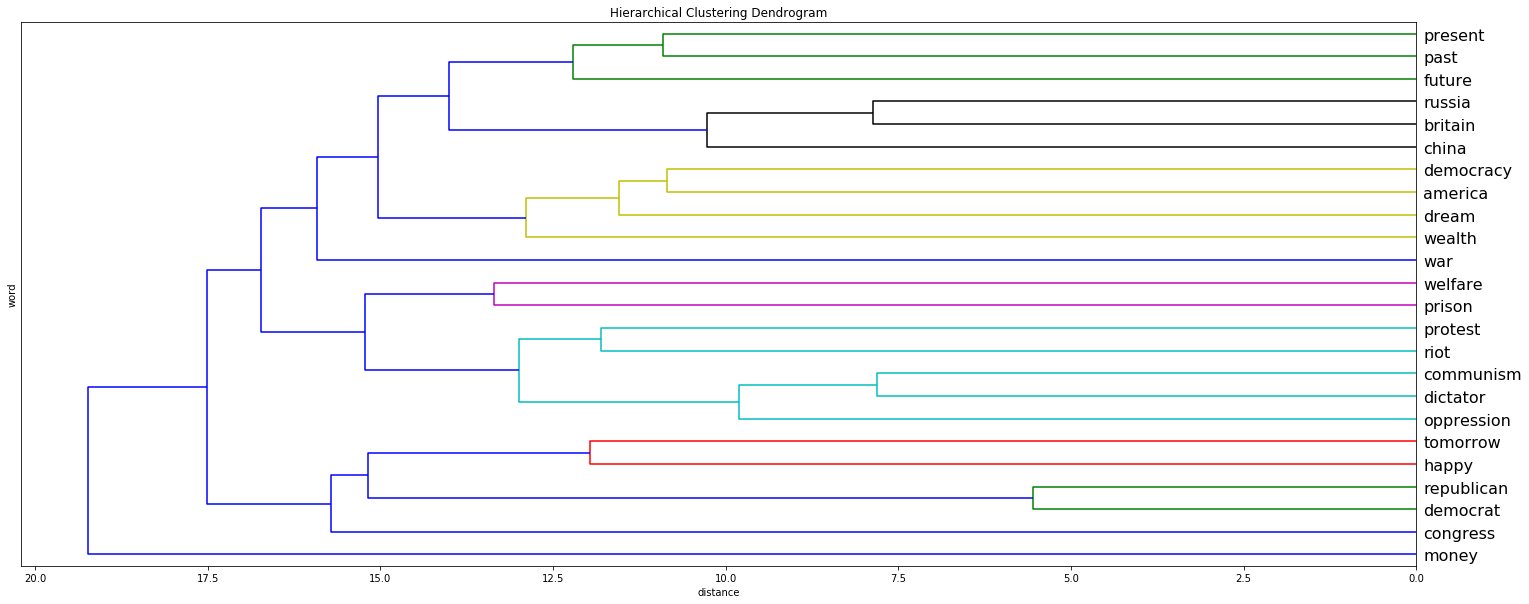

In [53]:
from matplotlib import pyplot as plt

l = links

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=0,  # rotates the x axis labels
    leaf_font_size=16,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(keywords[v])
)
plt.show()


*Note: if you get an error above, delete any words from the list.*

### Visualizing Abstract Relatedness

In [54]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors

In [55]:
#%matplotlib inline

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.wv.key_to_index ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

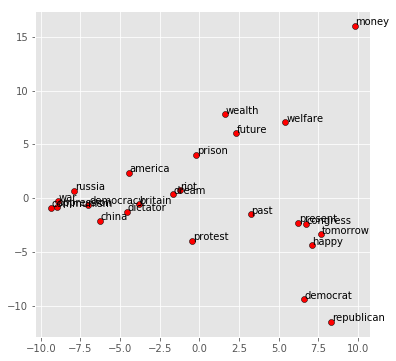

In [57]:
display_pca_scatterplot(wv, keywords)

# Study change over time

In [91]:
cd '/scratch/group/history/hist_3368-jguldi/congress-embeddings'

/scratch/group/history/hist_3368-jguldi/congress-embeddings


In [92]:
dataname = 'lemmatized-stopworded-bigrammed-congress-model'

In [93]:
keyword1 = 'woman'  # the word you want to research

In [98]:
#########  after the first run, use this line to call the old data without generating it again
keyword_context = []
dates_found = []

# cycle through each period
for period1 in periodnames:
    print('working on ', period1)
    
    # load the model from period1
    #period_model = gensim.models.Word2Vec.load(dataname + '-model-' + str(period1)) # to load a saved model
    period_wv = KeyedVectors.load(dataname + '--wv-model-' + str(period1)) # load the saved model
    
    ## is the keyword found?
    if keyword1 in period_wv.key_to_index:
        print('found ', keyword1)
        
        # get the context vector for keyword1
        keyword_context_period = period_wv.most_similar(keyword1, topn = 5000) 
        
        # save it for later
        keyword_context.append(keyword_context_period) # save the context of how women were talked about for later
        dates_found.append(period1)

working on  1870
found  woman
working on  1875
found  woman
working on  1880
found  woman
working on  1885
found  woman
working on  1890
found  woman
working on  1895
found  woman
working on  1900
found  woman
working on  1905
found  woman
working on  1910
found  woman
working on  1915
found  woman
working on  1920
found  woman
working on  1925
found  woman
working on  1930
found  woman
working on  1935
found  woman
working on  1940
found  woman
working on  1945
found  woman
working on  1950
found  woman
working on  1955
found  woman
working on  1960
found  woman
working on  1965
found  woman
working on  1970
found  woman
working on  1975
found  woman
working on  1980
found  woman
working on  1985
found  woman
working on  1990
found  woman
working on  1995
found  woman
working on  2000
found  woman
working on  2005
found  woman


#### Visualize it

In [99]:
# helper function to abstract only unique values while keeping the list in the same order -- the order of first appearance
def unique2(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [100]:
all_words = []
for i in range(len(dates_found)):
    words = [item[0] for item in keyword_context[i]][:10]
    all_words.append(words)

all_words2 = []
for list in all_words:
    for word in list:
        all_words2.append(word)

numwords = 10


In [ ]:
cd ~/ # go to your home directory

In [ ]:
%matplotlib inline
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from adjustText import adjust_text
from numpy import linspace
from matplotlib import cm

colors = [ cm.viridis(x) for x in linspace(0, 1, len(unique2(all_words2))+10) ]

# change the figure's size here
plt.figure(figsize=(10,10), dpi = 200)

texts = []

# plt.annotate only plots one label per iteration, so we have to use a for loop 
for i in range(len(dates_found)):    # cycle through the period names
    
    #yyy = int(keyword_per_year[keyword_per_year['5yrperiod'] == int(xx)]['count'])   # how many times was the keyword used that year?
                     
    for j in range(10):     # cycle through the first ten words (you can change this variable)
        
        xx = dates_found[i]        # on the x axis, plot the period name
        yy = [item[1] for item in keyword_context[i]][j]         # on the y axis, plot the distance -- how closely the word is related to the keyword
        txt = [item[0] for item in keyword_context[i]][j]        # grab the name of each collocated word
        colorindex = unique2(all_words2).index(txt)   # this command keeps all dots for the same word the same color
        
        plt.scatter(                                             # plot dots
            xx, #x axis
            yy, # y axis
            linewidth=1, 
            color = colors[colorindex],
            edgecolors = 'darkgray',
            s = 100, # dot size
            alpha=0.8)  # dot transparency

        # make a label for each word
        texts.append(plt.text(xx, yy, txt))

# Code to help with overlapping labels -- may take a minute to run
adjust_text(texts, force_points=0.2, force_text=.7, 
                    expand_points=(1, 1), expand_text=(1, 1),
                    arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

plt.xticks(rotation=90)

# Add titles
plt.title("What words were most similar to ''" + keyword1 + "' in Congress?", fontsize=20, fontweight=0, color='Red')
plt.xlabel("period")
plt.ylabel("similarity to " + keyword1)


filename = 'words-similar-to-' + keyword1 + '-' + dataname
plt.savefig(filename)